### Dépendances

In [4]:
import pandas as pd
from api import population_df_conso

### Import de la donnée

In [6]:
#df_calc_population.head()
#df_calc_population = pd.read_csv('./resultat_fusion.csv', sep=",", na_values="-")
df_calc_population = population_df_conso
df_calc_population 


,annee,population_totale,consommation_mwh
0,2012,825035,2465076.0
1,2013,829903,2560392.0
2,2014,837617,2554701.0
3,2015,843617,2636993.0
4,2016,844741,2708529.0
5,2017,852657,2676543.0
6,2018,860896,2726742.0
7,2019,862814,2748162.0


# Modelisation

c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:606: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:615: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:606: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:615: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(d

Mean Squared Error: 724815816.1793773
R-squared: 0.7850973621052517


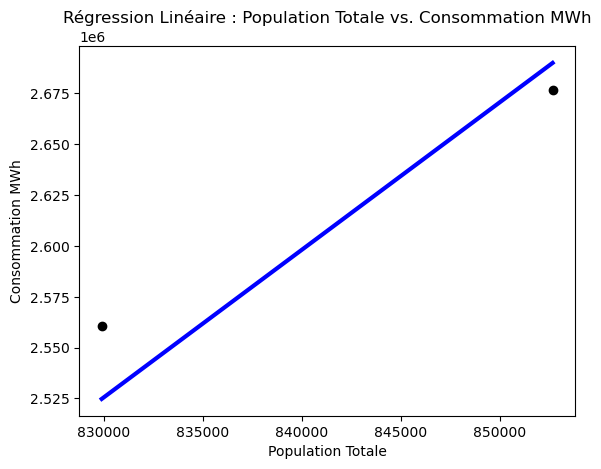

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assumez que votre DataFrame est appelé df
# Assurez-vous que les colonnes `annee`, `population_totale`, et `consommation_mwh` existent dans votre DataFrame

# Sélectionnez les colonnes pertinentes
data = df_calc_population[['annee', 'population_totale', 'consommation_mwh']]

# Supprimez les lignes avec des valeurs manquantes
data = data.dropna()

# Définissez l'année comme index
data.set_index('annee', inplace=True)

# Séparez les données en variables explicatives (X) et la variable cible (y)
X = data[['population_totale']]
y = data['consommation_mwh']

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisez le modèle de régression linéaire
model = LinearRegression()

# Entraînez le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluez les performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichez les résultats
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Tracez les prédictions par rapport aux valeurs réelles
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Population Totale')
plt.ylabel('Consommation MWh')
plt.title('Régression Linéaire : Population Totale vs. Consommation MWh')
plt.show()


In [8]:
print(df_calc_population.index)


RangeIndex(start=0, stop=8, step=1)


In [9]:
# Supposons que vous avez déjà chargé vos données dans df_calc_population

# Sélectionnez les colonnes pertinentes
data = df_calc_population[['annee', 'population_totale', 'consommation_mwh']]
data = data.dropna()

# Divisez les données en ensemble d'entraînement et ensemble de test
X = data[['population_totale']]
y = data['consommation_mwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez et entraînez le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluez les performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Utilisez le modèle pour faire des prédictions pour l'année 2030
df_2030 = pd.DataFrame({'population_totale': [9000000000]})
predictions_2030 = model.predict(df_2030)
print(f'Prédiction de consommation pour 2030: {predictions_2030[0]}')


Mean Squared Error: 724815816.1793773
R-squared: 0.7850973621052517
Prédiction de consommation pour 2030: 65324774097.725395


c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:606: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:615: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:606: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:615: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(d

In [13]:

# Supposons que vous ayez déjà le DataFrame df_predictions
df_calc_population['annee'] = df_calc_population['annee'].astype(int)
next_year = df_calc_population['annee'].iloc[0]

#next_year = last_year + 1
next_year
#next_year = population['annee'].astype(str).unique()


2012

In [14]:
# Enregistrez le DataFrame des prédictions dans un fichier CSV
# Créez un DataFrame pour les années de 2012 à 2030

years = list(range(next_year, 2031))
df_predictions = pd.DataFrame({'annee': years})

df_predictions.to_csv('predictions_2012_2030.csv', index=False)

# Affichez le DataFrame des prédictions
print(df_predictions)



    annee
0    2012
1    2013
2    2014
3    2015
4    2016
5    2017
6    2018
7    2019
8    2020
9    2021
10   2022
11   2023
12   2024
13   2025
14   2026
15   2027
16   2028
17   2029
18   2030


In [16]:
# Supposons que vous avez déjà chargé vos données dans df_calc_population

# Sélectionnez les colonnes pertinentes
data = df_calc_population[['annee', 'population_totale', 'consommation_mwh']]
data = data.dropna()

# Divisez les données en ensemble d'entraînement et ensemble de test
X = data[['population_totale']]
y = data['consommation_mwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Supprimez les valeurs manquantes dans l'ensemble d'entraînement
X_train = X_train.dropna()
y_train = y_train.dropna()

# Créez et entraînez le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluez les performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Mean Squared Error: {mse}')
#print(f'R-squared: {r2}')

# Utilisez le modèle pour faire des prédictions pour l'année 2030
df_2030 = pd.DataFrame({'population_totale': df_calc_population['population_totale']})
predictions_2030 = model.predict(df_2030)
print(f'Prédiction de consommation pour 2030: {predictions_2030[0]}')



Prédiction de consommation pour 2030: 2489403.7718948037


c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:606: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:615: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:606: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:615: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(d

cission ici

findus

In [22]:
# Supposons que vous avez déjà chargé vos données dans df_calc_population

# Sélectionnez les colonnes pertinentes
data = df_calc_population[['annee', 'population_totale', 'consommation_mwh']]
data = data.dropna()

# Divisez les données en ensemble d'entraînement et ensemble de test
X = data[['population_totale']]
y = data['consommation_mwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez et entraînez le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Estimez la population pour chaque année de 2012 à 2030
years = list(range(next_year, 2031))
df_predictions = pd.DataFrame({'annee': years})

# Utilisez une fonction pour estimer la population pour chaque année
def estimate_population(year):
    # Remplacez cette fonction par votre propre logique d'estimation
    # Pour cet exemple, on suppose une croissance linéaire de la population
    initial_population = X['population_totale'].iloc[0]
    population_growth_rate = 0.01  # exemple de taux de croissance de 2% par an
    estimated_population = initial_population * (1 + population_growth_rate) ** (year - 2012)
    return estimated_population

# Appliquez la fonction d'estimation pour chaque année
df_predictions['population_totale'] = df_predictions['annee'].apply(estimate_population)

# Faites des prédictions en utilisant le modèle
if not df_predictions.empty:
    df_predictions['consommation_mwh'] = model.predict(df_predictions[['population_totale']])
else:
    print("DataFrame df_predictions is empty. Unable to make predictions.")

# Enregistrez le DataFrame des prédictions dans un fichier CSV
df_predictions.to_csv('predictions_2012_2030.csv', index=False)

# Affichez le DataFrame des prédictions
#print(df_predictions)




print(df_predictions.head())  # Check the first few rows of df_predictions



   annee  population_totale  consommation_mwh
0   2012      825035.000000      2.489404e+06
1   2013      833285.350000      2.549291e+06
2   2014      841618.203500      2.609776e+06
3   2015      850034.385535      2.670867e+06
4   2016      858534.729390      2.732568e+06


c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:606: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:615: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:606: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gael.lisador\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:615: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(d